In [1]:
import os
import seaborn as sns
import pandas as pd

from matplotlib import pyplot as plt

In [17]:
os.listdir('results/xai_evaluation')

['fd001_c.csv', 'fd001.csv', 'fd003.csv', 'fd002.csv', 'fd004.csv']

In [19]:
df001 = pd.read_csv('results/xai_evaluation/fd001.csv')
df002 = pd.read_csv('results/xai_evaluation/fd002.csv')
df003 = pd.read_csv('results/xai_evaluation/fd003.csv')
df004 = pd.read_csv('results/xai_evaluation/fd004.csv')
#stability de vermu ; Faithfullness

df = df002

# Fonction pour détecter si 'model' contient une valeur numérique et 'time' est vide
def is_shifted(row):
    try:
        float_val = float(row['model'])
        return pd.isna(row['time'])  # time est vide ET model est un float
    except:
        return False

# Appliquer la fonction ligne par ligne
shifted_rows = df.apply(is_shifted, axis=1)

# Corriger les lignes détectées
df.loc[shifted_rows, 'time'] = df.loc[shifted_rows, 'model']
df.loc[shifted_rows, 'model'] = 'all'  # ou autre valeur correcte attendue
df002 = df

/var/folders/4n/dbp55rnj36bbhc54csnydk7w0000gn/T/ipykernel_96470/4220666440.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2775.9314551353455' '2866.856247663498' '2812.955833673477'
 '2782.262454509735' '2833.78377366066']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[shifted_rows, 'time'] = df.loc[shifted_rows, 'model']


In [20]:
df

,Unnamed: 0,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,Verm_stability,fidelity,sparsity,instability,model,time
0,0,1.0,1.0,0.7,0.027937,0.646123,0.029005,0.470501,0.556478,0.899733,78.830737,0.037500,34.673900,idfc,1430.937954
1,0,1.0,1.0,0.9,0.062415,1.344231,0.148256,0.553063,0.473166,0.891200,73.817733,0.037500,36.675507,idfc,1421.332152
2,0,1.0,1.0,1.0,0.040357,3.342779,0.045095,0.558253,0.386488,0.885867,135.648400,0.037500,34.100565,idfc,1400.315733
3,0,1.0,1.0,0.9,0.154175,0.584049,0.262516,0.278160,0.573585,0.901867,257.786604,0.050000,28.107909,idfc,1416.73112
4,0,1.0,1.0,1.0,0.173313,5.281020,0.239122,0.331500,0.660482,0.912533,208.073625,0.025000,29.906070,idfc,1405.89949
5,0,1.0,1.0,0.6,0.114764,4.363977,0.162819,0.492130,0.421189,0.858794,46.783885,0.015625,15.071207,all,2775.9314551353455
6,0,1.0,1.0,1.0,0.104287,17.289140,0.141009,0.548492,0.368232,0.835429,42.520075,0.015625,16.242408,all,2866.856247663498
7,0,1.0,1.0,0.8,0.153309,1.201381,0.219617,0.526028,0.367465,0.847619,47.286895,0.015625,15.566338,all,2812.955833673477
8,0,1.0,1.0,1.0,0.373266,2.336217,0.283108,0.295241,0.693443,0.896381,55.488845,0.015625,13.002051,all,2782.262454509735
9,0,1.0,1.0,1.0,0.162212,3.362577,0.192431,0.339942,0.655086,0.847619,54.040715,0.015625,13.204349,all,2833.78377366066


<Axes: xlabel='model', ylabel='time'>

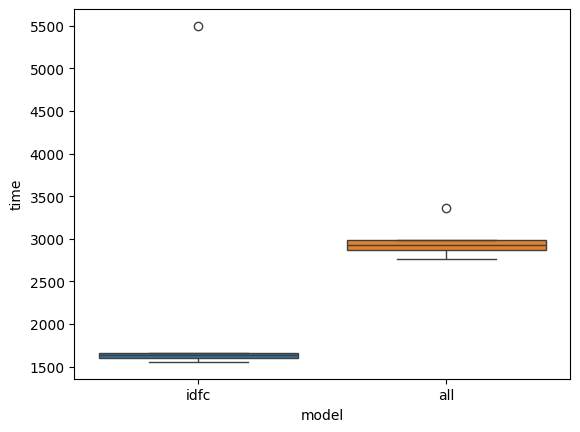

In [31]:
sns.boxplot(data=df004, x="model", y="time", hue='model')

<Axes: xlabel='model', ylabel='time'>

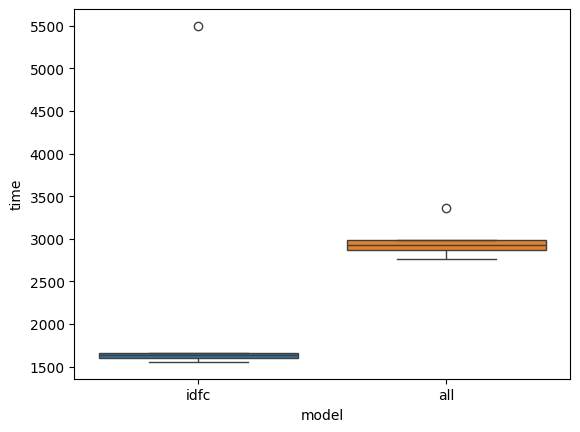

In [16]:
sns.boxplot(data=df004, x="model", y="time", hue='model')

<Axes: xlabel='model', ylabel='instability'>

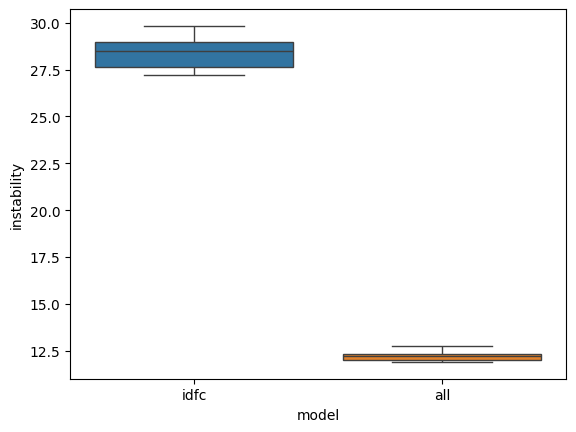

In [10]:
sns.boxplot(data=df003, x="model", y="instability", hue='model')